In [1]:
print('hello world')

hello world


In [2]:
import nltk

sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)

print(tokens)
print(tagged[0:6])

['At', 'eight', "o'clock", 'on', 'Thursday', 'morning', '...', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']
[('At', 'IN'), ('eight', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Thursday', 'NNP'), ('morning', 'NN')]


In [3]:
from gensim import models

corpus = [[(0, 1.0), (1, 1.0), (2, 1.0)],
[(2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (8, 1.0)],
[(1, 1.0), (3, 1.0), (4, 1.0), (7, 1.0)],
[(0, 1.0), (4, 2.0), (7, 1.0)],
[(3, 1.0), (5, 1.0), (6, 1.0)],
[(9, 1.0)],
[(9, 1.0), (10, 1.0)],
[(9, 1.0), (10, 1.0), (11, 1.0)],
[(8, 1.0), (10, 1.0), (11, 1.0)]]

tfidf = models.TfidfModel(corpus)
vec = [(0, 1), (4, 1)]
print(tfidf[vec])

[(0, 0.8075244024440723), (4, 0.5898341626740045)]


In [4]:
from textblob import TextBlob

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
print(blob.tags)
print(blob.noun_phrases)

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

blob.translate(to="es")  # 'La amenaza titular de The Blob...'

[('The', 'DT'), ('titular', 'JJ'), ('threat', 'NN'), ('of', 'IN'), ('The', 'DT'), ('Blob', 'NNP'), ('has', 'VBZ'), ('always', 'RB'), ('struck', 'VBN'), ('me', 'PRP'), ('as', 'IN'), ('the', 'DT'), ('ultimate', 'JJ'), ('movie', 'NN'), ('monster', 'NN'), ('an', 'DT'), ('insatiably', 'RB'), ('hungry', 'JJ'), ('amoeba-like', 'JJ'), ('mass', 'NN'), ('able', 'JJ'), ('to', 'TO'), ('penetrate', 'VB'), ('virtually', 'RB'), ('any', 'DT'), ('safeguard', 'NN'), ('capable', 'JJ'), ('of', 'IN'), ('as', 'IN'), ('a', 'DT'), ('doomed', 'JJ'), ('doctor', 'NN'), ('chillingly', 'RB'), ('describes', 'VBZ'), ('it', 'PRP'), ('assimilating', 'VBG'), ('flesh', 'NN'), ('on', 'IN'), ('contact', 'NN'), ('Snide', 'JJ'), ('comparisons', 'NNS'), ('to', 'TO'), ('gelatin', 'VB'), ('be', 'VB'), ('damned', 'VBN'), ('it', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('concept', 'NN'), ('with', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('devastating', 'JJ'), ('of', 'IN'), ('potential', 'JJ'), ('consequences', 'NNS'), ('not', 'RB'), ('

TextBlob("La amenaza titular de The Blob siempre me ha parecido la película definitiva.
Monstruo: una masa con forma de ameba insaciablemente hambrienta capaz de penetrar
virtualmente cualquier salvaguardia, capaz de - como un doctor condenado de forma escalofriante
Lo describe - "asimilando carne al contacto.
Las malditas comparaciones con la gelatina se condenan, es un concepto con el más
devastadora de posibles consecuencias, no a diferencia del escenario goo gris
Propuesto por teóricos tecnológicos temerosos de
La inteligencia artificial corre desenfrenada.")

In [6]:
import tensorflow as tf
 
hello=tf.constant('Hello,TensorFlow!')
sess=tf.Session()
print(sess.run(hello))

b'Hello,TensorFlow!'


Example taken from [https://www.tensorflow.org/tutorials/keras/basic_classification](https://www.tensorflow.org/tutorials/keras/basic_classification).

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.1


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

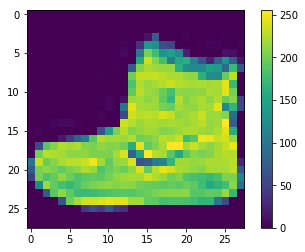

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

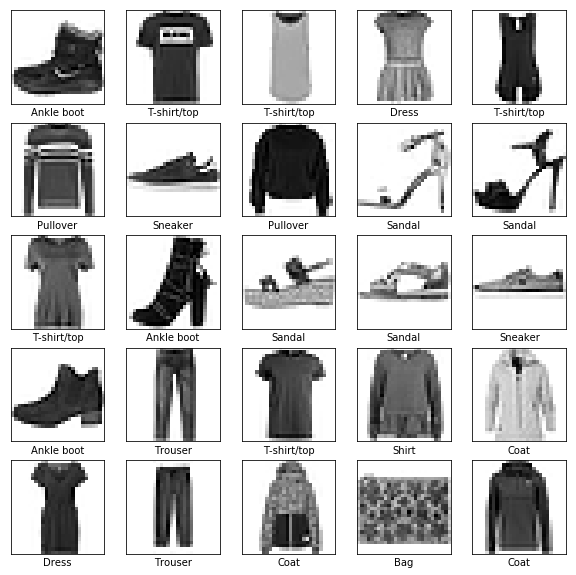

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.4988 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.3757 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 180s 3ms/sample - loss: 0.3366 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 173s 3ms/sample - loss: 0.3091 - acc: 0.8878
Epoch 5/5
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.2941 - acc: 0.8921


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
test_labels[0]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
    color = 'blue'
    else:
    color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)